In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # отключем предупреждения итоговой работе


#### Задания к уроку 3

##### 1. Задание (в программе)
Нарисуйте график функции:
y(x) = k·cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

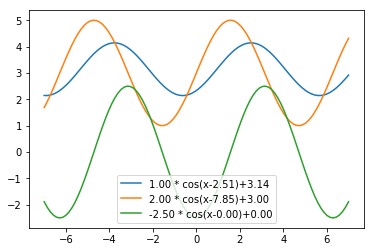

In [2]:
x = np.linspace(-7, 7, 100)
k =  [1, 2, -2.5]
a  = [0.8* np.pi, 2.5 * np.pi, 0]
b  = [np.pi, 3, 0]
fig, ax = plt.subplots()
for i in range(3): 
    f =  k[i] * np.cos(x-a[i]) + b[i] 
    ax.plot(x, f, label=f'{k[i]:3.2f} * cos(x-{a[i]:3.2f})+{b[i]:3.2f}')
ax.legend()
plt.show()

##### 3. Задание (в программе)

1) Напишите код, который будет переводить полярные координаты в декартовы.

2) Напишите код, который будет рисовать график окружности в полярных
координатах.

In [3]:
def polar_to_dekart(R, alpha):
    x = R * np.cos(alpha)
    y = R * np.sin(alpha)
    return x,y

In [4]:
polar_to_dekart(1, np.pi)

(-1.0, 1.2246467991473532e-16)

In [5]:
def show_circle_polar(R):
    x = np.linspace(0, np.pi * 2, 1000)
    y = R+x*0
    plt.rcParams['axes.grid'] = True
    plt.axis('scaled')
    plt.polar(x,y, color = 'black')
    plt.ylim(0, R + 3)
    plt.xlim(0, np.pi * 2)

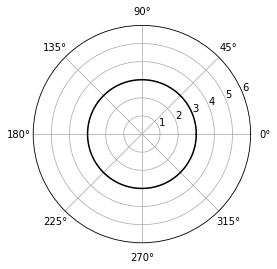

In [6]:
show_circle_polar(3)

##### 4. Задание (в программе)
1) Решите систему уравнений:

y = x**2  – 1

exp(x) + x·(1 – y) = 1

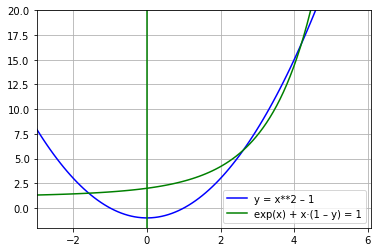

In [7]:
MAX_Y = 20
MIN_Y = -2
MAX_X = 6.1
MIN_X = -3
def f1(x):
    return x**2 -1

def f2(x):
    return (np.exp(x)+x-1)/x



def show_graphic():
    x = np.linspace(MIN_X, MAX_X, 100)
    plt.plot(x, f1(x), color = 'blue', label = 'y = x**2 – 1')
    plt.plot(x, f2(x), color = 'green', label = 'exp(x) + x·(1 – y) = 1')
    plt.axvline(x=0, color = 'green')
    plt.ylim(MIN_Y, MAX_Y)
    plt.xlim(MIN_X, MAX_X)
    
show_graphic()
plt.legend()

Корни системы уравнений:
-0.0 -1.0
2.61815 5.85469
4.20011 16.64089
-1.58184 1.5022


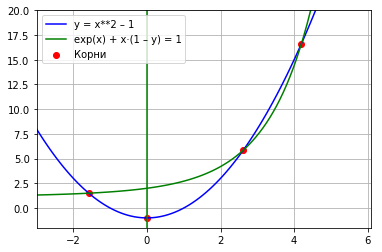

In [8]:
from scipy.optimize import fsolve

def equations(p):
    x,y = p
    return (y - x**2 + 1, np.exp(x) + x * (1 - y) - 1)

def show_roots(xy):
    if len(xy) == 0:
        return
    
    print('Корни системы уравнений:')
    need_add_legend = True
    for xy in result:
        print(xy[0], xy[1])
        if need_add_legend:
            plt.scatter(xy[0], xy[1], color='red', label = 'Корни')
        else:
            plt.scatter(xy[0], xy[1], color='red')
        need_add_legend = False

x = np.linspace(MIN_X, MAX_X, 100)
result = set()
for x_ in x:
    x1, y1 = fsolve(equations, (x_,0))
    result.add((np.round(x1,5),np.round(y1,5)))

show_graphic()
show_roots(result)
plt.legend()

2) Решите систему уравнений и неравенств:
    
y = x**2 – 1

exp(x) + x·(1 – y) > 1

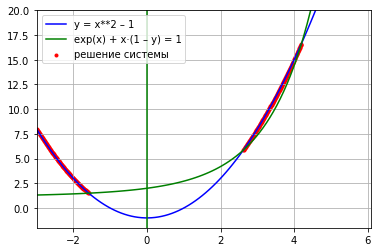

In [9]:
show_graphic()
spam_x = []
spam_y = []
x = np.linspace(MIN_X, MAX_X, 1000)
for x_ in x:
    if f2(x_) < f1(x_):
        spam_x.append(x_)   
        spam_y.append(f1(x_))  
plt.scatter(spam_x, spam_y, color = 'red', label='решение системы', marker="." )
plt.legend()

#### Задания к уроку 4

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [10]:
def is_zero(x):
    if x==0:
        return True
    else:
        return False

def is_red(x):
    red =   ( 1, 3, 5, 7,  9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36)
    if x in red:
        return True
    else:
        return False

def is_black(x):
    black = ( 2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35)
    if x in black:
        return True
    else:
        return False    
    
def is_odd(x):
    if x % 2 == 1:
        return True
    else:
        return False

def is_even(x):
    if (x % 2 == 0) and (x != 0):
        return True
    else:
        return False

def is_between(x, a, b):
    if (x >= a) and (x <= b):
        return True
    else:
        return False
    
def is_col(x, c):
    if (x % 3 == c) and (x != 0):
        return True
    else:
        return False
    
def analys_result(x):
    result = []
    if is_zero(x):
        return ['Выпало zero']
    if is_red(x):
        result.append('Выпало красное')
    if is_black(x):
        result.append('Выпало черное') 
    if is_odd(x):
        result.append('Выпало нечетное') 
    if is_even(x):
        result.append('Выпало четное') 
    if is_between(x, 1, 18):
        result.append('Выпало 1to18') 
    if is_between(x, 19, 36):
        result.append('Выпало 19to36') 
    if is_between(x, 1, 12):
        result.append('Выпало 1st12') 
    if is_between(x, 13, 24):
        result.append('Выпало 2nd12') 
    if is_between(x, 25, 36):
        result.append('Выпало 3rd12') 
    if is_col(x, 1):
        result.append('Выпало 1col')
    if is_col(x, 2):
        result.append('Выпало 2col')
    if is_col(x, 0):
        result.append('Выпало 3col') 
    return result

for i in range(0, 5):
    x = np.random.randint(0, 37)
    print(f'{x}:{analys_result(x)}')

29:['Выпало черное', 'Выпало нечетное', 'Выпало 19to36', 'Выпало 3rd12', 'Выпало 2col']
27:['Выпало красное', 'Выпало нечетное', 'Выпало 19to36', 'Выпало 3rd12', 'Выпало 3col']
16:['Выпало красное', 'Выпало четное', 'Выпало 1to18', 'Выпало 2nd12', 'Выпало 1col']
28:['Выпало черное', 'Выпало четное', 'Выпало 19to36', 'Выпало 3rd12', 'Выпало 1col']
28:['Выпало черное', 'Выпало четное', 'Выпало 19to36', 'Выпало 3rd12', 'Выпало 1col']


2.
1) Напишите код, проверяющий любую из теорем сложения или умножения
вероятности на примере подбрасывания монетки

In [11]:
is_heads  = 0
is_tails = 0
n = 10000
for i in range(0,n):
    x = np.random.randint(0, 2)
    if x == 1:
        is_heads+=1
    else:
        is_tails+=1
print(f'Орлов {is_heads/n}, решек {is_tails/n} вероятность {is_heads/n+is_tails/n}')

Орлов 0.5073, решек 0.4927 вероятность 1.0


2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

Text(0.5, 1.0, 'Histogram')

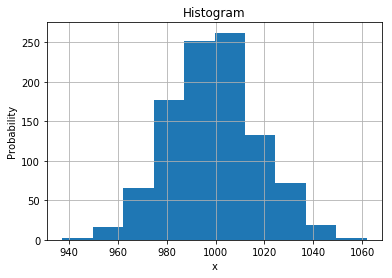

In [12]:
N=1000 
n=10
M = 100
m = 10
x = []
for i in range(N):
    spam = sum(M + np.random.uniform(-m, m) for k in range(n))
    x.append(spam)
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

3.

1) Дополните код Монте-Карло последовательности независимых испытаний
расчетом соответствующих вероятностей (через биномиальное распределение)
и сравните результаты.

2) Повторите расчеты, взяв другие значения n и k

In [13]:
import math

def P(n, k):
    s, N = 0, 100000
    x = sum(np.random.randint(0, 2, N) for i in range(n))
    for i in range(0, N):
        if x[i] == k:
            s = s + 1
    result = math.factorial(n)/(math.factorial(k) * math.factorial(n-k)) / 2**n 
    print(f'Успехов {s} из {N}, Вероятность по методу Монте-Карло {s/N}, по формуле биноминального распределения {result} ')

P( 4,2)
P(10,3)

Успехов 37411 из 100000, Вероятность по методу Монте-Карло 0.37411, по формуле биноминального распределения 0.375 
Успехов 11751 из 100000, Вероятность по методу Монте-Карло 0.11751, по формуле биноминального распределения 0.1171875 


5. Дополните код расчетом коэффициента корреляции x и y по формуле

0.6366180340568953 0.1910290150521184
0.6366180340568954 0.19102901505211806


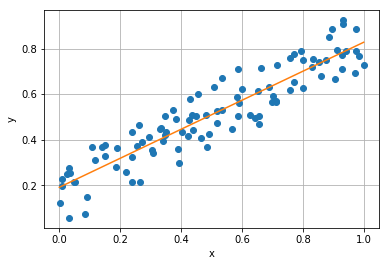

In [14]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [15]:
xm = np.mean(x)
ym = np.mean(y)
R = sum((x-xm)*(y-ym))/np.sqrt(sum((x-xm)**2) * sum((y-ym)**2))
print(f'Коффицент кореляции по формуле {R} и готовой функции {np.corrcoef(x,y)[0,1]}')

Коффицент кореляции по формуле 0.9220637206351034 и готовой функции 0.9220637206351036


Доп. задачи к вебинару 2
4. Игра, которую я сам только что придумал и пока не решал:
 - Играют трое, перед игрой скидываются в равных долях и кладут в шляпу три купюры
 - 50, 100 и 200 рублей (всего 350).
 - Дальше 1й игрок вытаскивает наудачу купюру (они неотличимы на ощупь), смотрит,
   что вытащил, докладывает в шляпу свою такую же + возвращает вытянутую.
 - Потом то же самое делают 2й и 3й игроки (у всех запас 50, 100 и 200-рублевок). Т.е.
   после 1го раунда в шляпе уже 6 купюр.
 - Игра повторяется N раундов. Сначала рассмотреть N=1, а потом больше.
 - В финале все по очереди по кругу наудачу вытаскивают из шляпы по купюре, т.е. у
   каждого остается ровно N+1 купюр.
 - Каким игроком (1,2,3м) быть выгоднее?

In [16]:
import random

# Разыгрывается 1 раунд
def play_round(hat, bank):
    for i in range(len(bank)):
        val = random.choice(hat)
        bank[i] -= val
        hat.append(val)
        
# Финальный раунд сбора очков
def final_round(hat, bank):
    while len(hat) > 0:
        for i in range(len(bank)):
            index = random.randint(0, len(hat)-1)          
            val = hat.pop(index)
            bank[i] += val
    return bank

# Разыгрывается 1 игра между PLAYERS игроков в  rounds раундах
def play_game(players, rounds):
    hat = get_hat(players)
    bank = [0 for _ in range(players)]
    for i in range(rounds):
        play_round(hat, bank) 
    return final_round(hat, bank)

# Изменения начальных купюр в шляпе при большем количестве игроков
def get_hat(players):
    hat = [50, 100, 200]
    for i in range(players-3):
        val = random.choice(hat)
        hat.append(val)
    return hat
# Определение победителя        
def winner(bank):
    return bank.index(max(bank))

In [17]:

COUNT_GAMES = 100000 # количество игр
PLAYERS = 3 # количество игроков (минимум 3)
MAX_ROUND = 10 # количество раундов
def play(players):
    if players <3:
        return
    for rounds in range(1, MAX_ROUND + 1):
        total = np.array([0 for _ in range(players)])
        winners = [0 for _ in range(players)]
        print(f'Количество раундов: {rounds}')
        for i in range(COUNT_GAMES):
            x = play_game(players, rounds)
            total +=x
            winners[winner(x)] += 1
            # print(f'{x},{total}, {winners}')
        for i in range(len(total)):
            print(f'{i+1} игрок выиграл  {total[i]} руб. и был победителем {winners[i]} раз, в среднем '+
                  f'{total[i]/COUNT_GAMES :.3f} руб. и {winners[i]/COUNT_GAMES :.5f} раза')

play(PLAYERS)

Количество раундов: 1
1 игрок выиграл  11696200 руб. и был победителем 36988 раз, в среднем 116.962 руб. и 0.36988 раза
2 игрок выиграл  11595350 руб. и был победителем 33136 раз, в среднем 115.954 руб. и 0.33136 раза
3 игрок выиграл  11708450 руб. и был победителем 29876 раз, в среднем 117.085 руб. и 0.29876 раза
Количество раундов: 2
1 игрок выиграл  11673200 руб. и был победителем 37175 раз, в среднем 116.732 руб. и 0.37175 раза
2 игрок выиграл  11692650 руб. и был победителем 33503 раз, в среднем 116.927 руб. и 0.33503 раза
3 игрок выиграл  11634150 руб. и был победителем 29322 раз, в среднем 116.341 руб. и 0.29322 раза
Количество раундов: 3
1 игрок выиграл  11652950 руб. и был победителем 37091 раз, в среднем 116.529 руб. и 0.37091 раза
2 игрок выиграл  11656200 руб. и был победителем 33222 раз, в среднем 116.562 руб. и 0.33222 раза
3 игрок выиграл  11690850 руб. и был победителем 29687 раз, в среднем 116.909 руб. и 0.29687 раза
Количество раундов: 4
1 игрок выиграл  11649950 руб.

##### Вывод
Игрок 1 выигрывает чаще других, но средний размер выигрыша не отличается от среднего выигрыша других игроков. При этом шанс выиграть уменьшается с увеличением порядкового номера игрока.

С увеличением количества игроков ситуация сохраняется: 

    1) с увеличением порядкового номера игрока шанс выигрыша уменьшается
    2) средний выигрыш игроков не отличается

##### 3. Парадокс Монти-Холла:
    - Американская телеигра «Let’s Make a Deal» предлагает участникам выбрать одну из
трёх дверей:
    - За одной из дверей находится (равновероятно) автомобиль, за двумя другими
дверями — козы.
    - Вы выбираете одну из дверей, например, номер 1, после этого ведущий, который
знает, где находится автомобиль, а где — козы, открывает одну из оставшихся дверей,
например, номер 3, за которой находится коза. После этого он спрашивает вас — не
желаете ли вы изменить свой выбор и выбрать дверь номер 2?
    - Увеличатся ли ваши шансы выиграть автомобиль, если вы примете предложение
ведущего и измените свой выбор?
    - А если вы будете подбрасывать монету, и, если выпадет орел - менять выбор, а если
решка - нет?

In [18]:
import collections

def init_vector():
    rooms = np.array([0, 0, 0])
    car_ind = random.randint(0, 2)
    rooms[car_ind ] = 1
    return rooms

def delete_element(rooms, decision, ind): 
        # print(f'{rooms}-{decision}/{ind}' )
        rooms = np.delete(rooms, ind) # открыв дверь с козой, забываем об этой комнате
        decision = np.delete(decision, ind) # уменьшаем набор альтернатив выбора
        return rooms, decision
        
def open_first_door(rooms, decision):
    spam = rooms + decision
    if max(spam) == 2: # первоначальное решение верное
        k = random.randint(0, 1) # ведущий решает какую дверь открыть
        ind, = np.where(spam == 0)
        return delete_element(rooms, decision, ind[k]) # открывает дверь с козой
    else: # первоначальное решение не верное
        ind, = np.where(spam == 0) # ищем невыбранную дверь в комнату с козой
        return delete_element(rooms, decision, ind[0]) # открывает дверь с козой
        
def Make_a_Deal(what_do):
    rooms = init_vector() # инициализация комнат
    decision = init_vector() # выбор двери участником
    # print(f'{rooms}-{decision}' )
    rooms, decision = open_first_door(rooms, decision) # ведущий открывает дверь с козой
    if what_do == 'change':
        decision = decision[::-1] # меняем свой выбор
    if what_do == 'no_change':
        pass
    if what_do == 'random' and random.randint(0, 1) == 1:
         decision = decision[::-1] # меняем свой выбор, если выпал орел
    # print(f'{rooms}-{decision}' )
    return np.array_equal(rooms, decision)


In [19]:
N = 100000
result = collections.Counter() 
title = ['change', 'no_change', 'random']
for i in range(N): 
    if Make_a_Deal(title[0]):
        result[title[0]] += 1
    if Make_a_Deal(title[1]):
        result[title[1]] += 1
    if Make_a_Deal(title[2]):
        result[title[2]] += 1

print(f'Вероятность выигрыша')
print(f'Измените свой выбор: {result[title[0]] / N:14.5f}')
print(f'Оставите свой выбор: {result[title[1]] / N:14.5f} ')
print(f'Менять, подкидывая монетку: {result[title[2]] / N:.5f} ')

Вероятность выигрыша
Измените свой выбор:        0.66777
Оставите свой выбор:        0.33325 
Менять, подкидывая монетку: 0.50410 


##### Вывод
Согласно полученным результатам выгоднее всегда менять дверь. 